<a href="https://colab.research.google.com/github/shamiya829/ev-adoption/blob/main/electric_vehicle_adoption_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electric Vehicle Adoption Analysis
Shamiya Lin

February 22, 2024

### Import dataset & show datahead

In [4]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")

Imported all libraries successfully...


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = pd.read_csv("Electric_Vehicle_Population_Data.csv")

data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


### Clean dataset

In [6]:
# check for missing values
missing_values = data.isnull().sum()

# drop rows with missing values in critical columns (if any)
cleaned_data = data.dropna(subset=['Model Year', 'Make', 'Model', 'Electric Vehicle Type'])

# Display the cleaned dataset
print(cleaned_data.head())


   VIN (1-10)     County          City State  Postal Code  Model Year  \
0  5UXKT0C59G     Yakima        Zillah    WA      98953.0        2016   
1  5YJ3E1EA2J  Snohomish       Edmonds    WA      98020.0        2018   
2  1G1RE6E4XE     Kitsap  Port Orchard    WA      98367.0        2014   
3  2C4RC1L76M     Skagit           Bow    WA      98232.0        2021   
4  5YJ3E1EA2J   Thurston       Olympia    WA      98513.0        2018   

        Make     Model                   Electric Vehicle Type  \
0        BMW        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1      TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
2  CHEVROLET      VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
3   CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
4      TESLA   MODEL 3          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range            14.0   
1           Clean Alte

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Electric Vehicle Registrations by Model Year')

Text(0.5, 0, 'Model Year')

Text(0, 0.5, 'Number of Registrations')

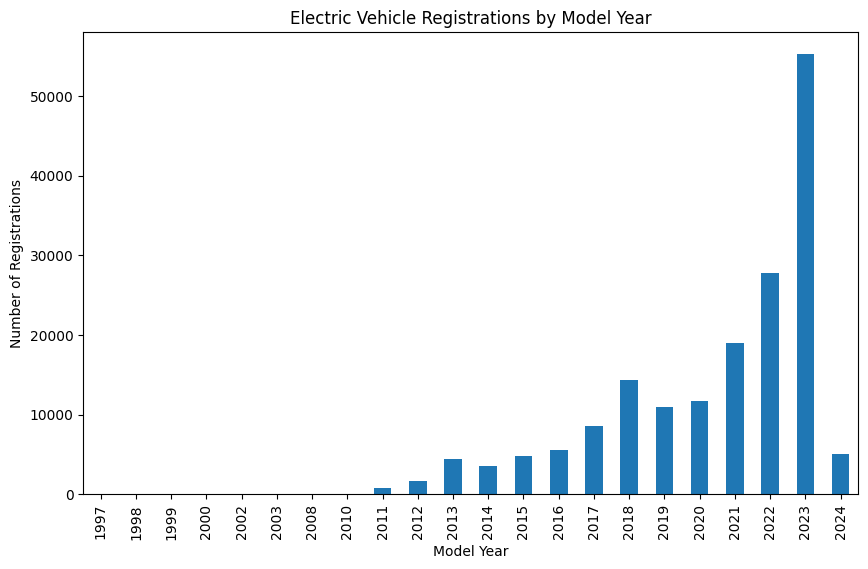

In [7]:

ev_count_by_year = cleaned_data['Model Year'].value_counts().sort_index()

# plotting data
plt.figure(figsize=(10, 6))
ev_count_by_year.plot(kind='bar')
plt.title('Electric Vehicle Registrations by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top 10 Most Popular Electric Vehicle Makes')

Text(0.5, 0, 'Make')

Text(0, 0.5, 'Number of Vehicles')

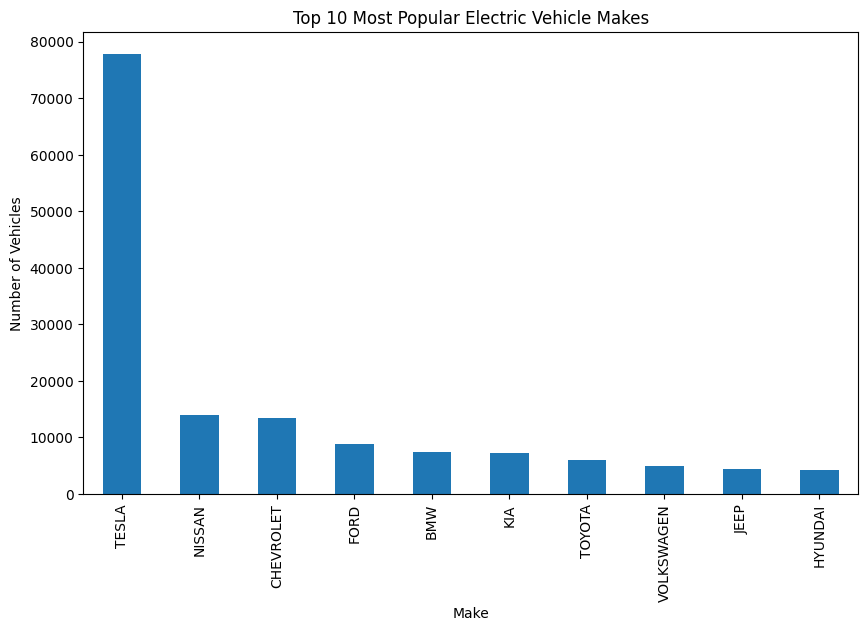

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Make,Model'>

Text(0.5, 1.0, 'Top 10 Most Popular Electric Vehicle Models')

Text(0.5, 0, 'Make and Model')

Text(0, 0.5, 'Number of Vehicles')

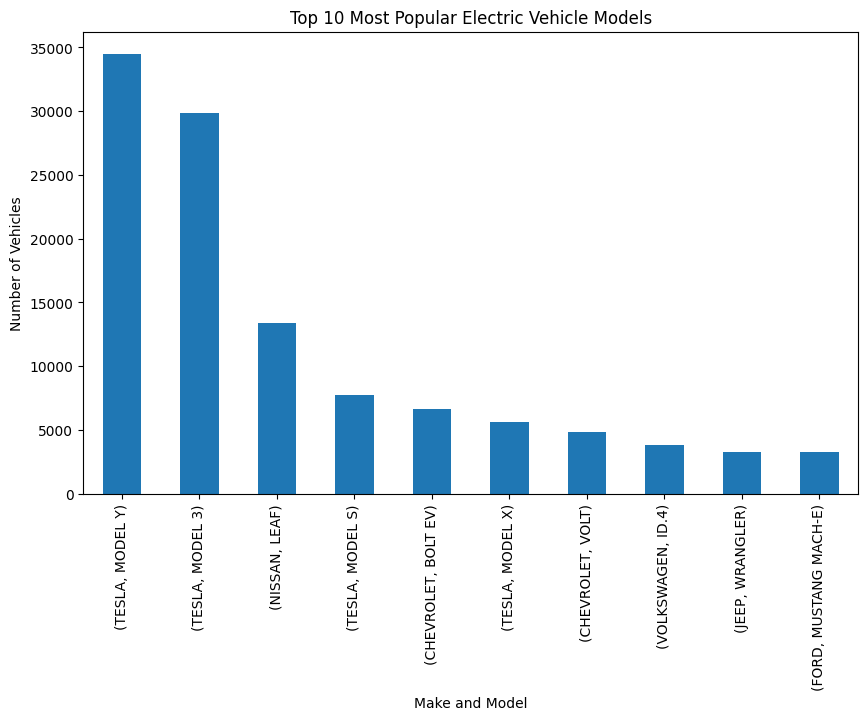

In [9]:
# most popular makes
popular_makes = cleaned_data['Make'].value_counts().head(10)

# most popular models
popular_models = cleaned_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).head(10)

# plotting the most popular makes
plt.figure(figsize=(10, 6))
popular_makes.plot(kind='bar')
plt.title('Top 10 Most Popular Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.show()

# plotting the most popular models
plt.figure(figsize=(10, 6))
popular_models.plot(kind='bar')
plt.title('Top 10 Most Popular Electric Vehicle Models')
plt.xlabel('Make and Model')
plt.ylabel('Number of Vehicles')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top 10 Counties with Electric Vehicle Registrations')

Text(0.5, 0, 'County')

Text(0, 0.5, 'Number of Vehicles')

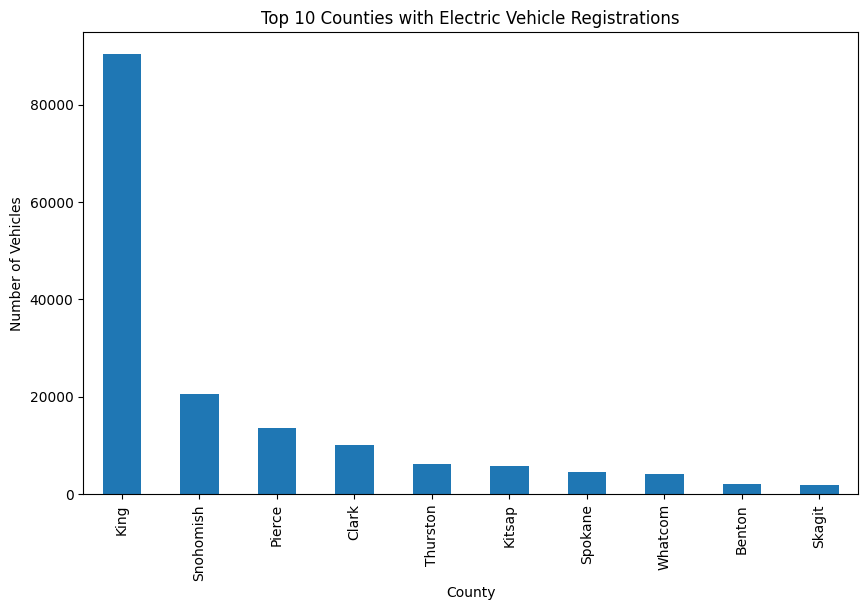

In [10]:
# count of electric vehicles by county
ev_count_by_county = cleaned_data['County'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ev_count_by_county.plot(kind='bar')
plt.title('Top 10 Counties with Electric Vehicle Registrations')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.show()
